In [1]:
import numpy as np
import porepy as pp
import scipy.sparse as sps
import math 
import sys
sys.path.append("../class")
from Flow_class import Flow
from Transport_class import Transport
from Reaction_class import Reaction

In [2]:
Nx=100
Ny=5

In [3]:
#gb= pp.grid_buckets_2d.single_vertical([Nx, Ny], y_endpoints=[0.6, 0.2], simplex=False)
#gb, domain = pp.grid_buckets_2d.single_horizontal([Nx, Ny], x_endpoints=[0.2, 0.8], simplex=False)
#print(domain)
#pp.plot_grid(gb,figsize=[15,12])
#domain={'xmin': 0, 'xmax': 1, 'ymin': 0, 'ymax': 1}




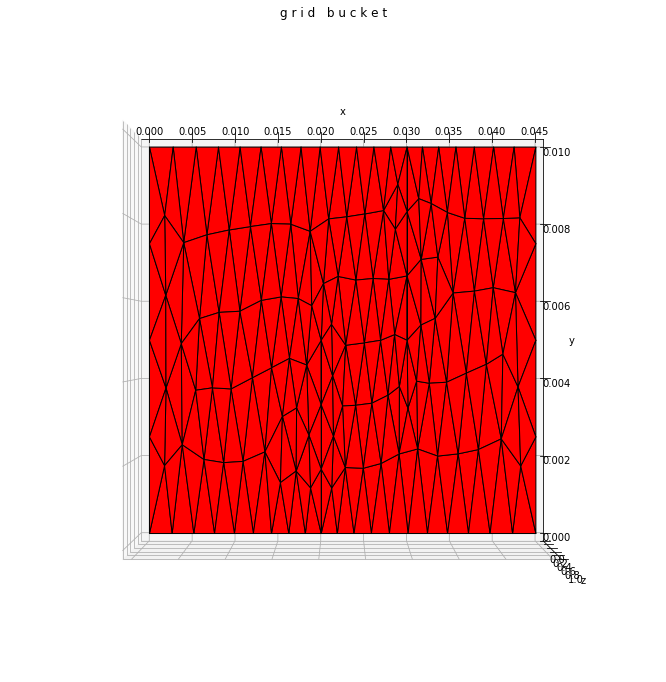

In [4]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}


# Generate a mixed-dimensional mesh
gb = network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))

In [5]:
parameter={"aperture":1e-3,
           "fracture_perm":1,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
          #"fracture_perm":0.001,
           #"perm":1.0e-9,
           #"perm":2e-10,
           "perm":1e-10,
          #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          "bc_value":[15.0,0.0],
          #"bc_value":[5.0e-9,0.0],
           #"bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

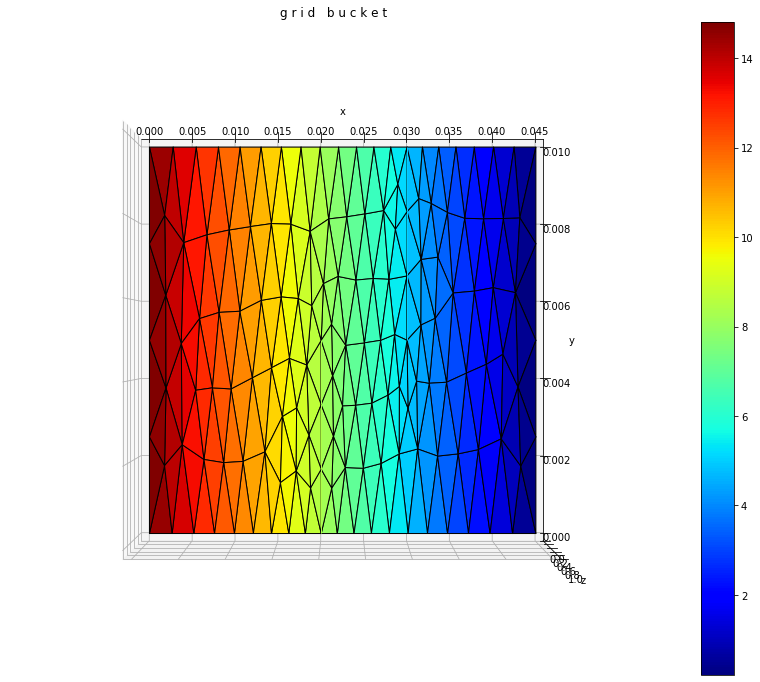

In [6]:
flow=Flow(gb,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [7]:
parameter={
    "aperture":1e-3,
    "por":0.3,
    #"por_frac":0.00001,
    #"por":1.0,
    "por_frac":0.3,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport=Transport(gb,domain,parameter)

In [8]:
Ca_value=[0.0,0.0]
Ca_type=['dir','dir']
CaSiO3_value=[0.0,0.0]
CaSiO3_type=['dir','dir']
Ca="Ca"
CaSiO3="CaSiO3"

In [9]:
reaction_data={"temperature":423,
       "A":1.9e-2,
       #"rate_const":0.00446,
       "rate_const":0.0005,
       "E":4700,
       "R":8.314,
       "K_eq":10e9,
       "ph":3.5,
       "mass_weight":0.3*1.0}
reaction=Reaction(reaction_data)
reaction.set_const_rate()
print(reaction.const_rate)

2.4964205820053154e-06


In [10]:
transport.set_data(Ca_value,Ca_type,Ca)
transport.get_flux(Ca)
transport.discretize(Ca)
lhs_Ca,rhs_source_adv_Ca,rhs_mass_Ca,assembler_Ca=transport.get_transport_lhs_rhs(Ca)
#ciao?1



P0_flux
[[ 3.32867643e-08  3.37197962e-08  3.29795704e-08  3.33612738e-08
   3.26837993e-08  3.26346698e-08  3.10622637e-08  3.23741460e-08
   3.31886847e-08  3.36551059e-08  3.20398722e-08  3.26645673e-08
   3.25069652e-08  3.39588246e-08  3.25337429e-08  3.23405383e-08
   3.16484784e-08  3.36700955e-08  3.26389810e-08  3.17168723e-08
   3.29485943e-08  3.36666403e-08  3.31131440e-08  3.26106577e-08
   3.29643008e-08  3.48298781e-08  3.37174225e-08  3.20245345e-08
   3.24655302e-08  3.29515804e-08  3.31664984e-08  3.17713844e-08
   3.26003710e-08  3.27629026e-08  3.29915595e-08  3.23966897e-08
   3.46555058e-08  3.27785037e-08  3.22672167e-08  3.46919837e-08
   3.27276577e-08  3.26536984e-08  3.37514764e-08  3.25622666e-08
   3.34449839e-08  3.09404717e-08  3.21523414e-08  3.25913093e-08
   3.30157669e-08  3.27456076e-08  3.26333206e-08  3.26157575e-08
   3.30379124e-08  3.10382253e-08  3.31338813e-08  3.26633998e-08
   3.38437656e-08  3.08628077e-08  3.34807923e-08  3.24029401e-08
  

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:127: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


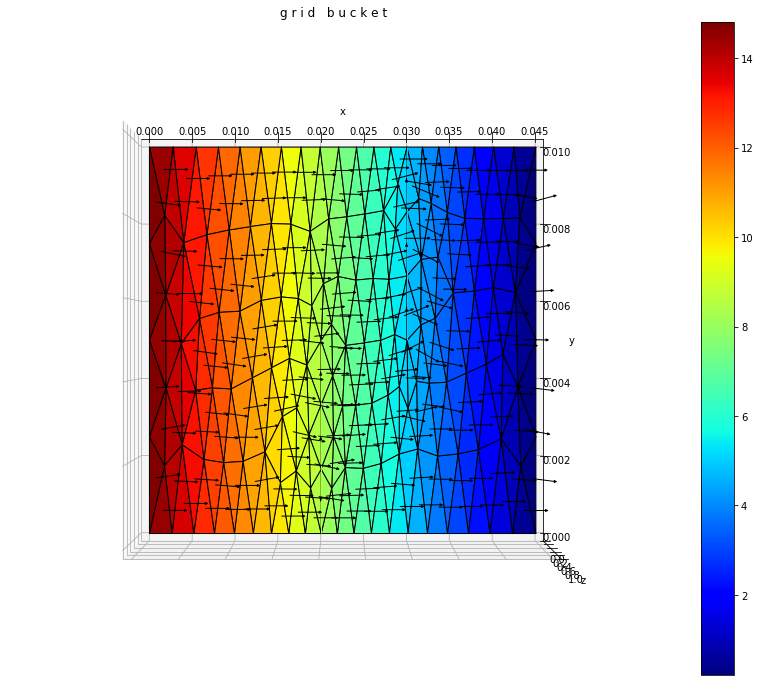

In [11]:
## to export the flux
key='Ca'
flux='darcy_flux'
mortar='mortar_flux'
flux_P0="P0_flux"

discr_P0_flux = pp.MVEM(key)
for g, d in gb:
    discr_P0_flux.discretize(g, d)
    d[pp.STATE][flux] = d[pp.PARAMETERS][key][flux]

## construct the P0 flux reconstruction
pp.project_flux(gb, discr_P0_flux, flux, flux_P0, mortar)

for g,d in gb:
    print("P0_flux")
    print(d[pp.STATE]["P0_flux"])

for g,d in gb:
    print("pressure")
    print(d[pp.STATE]["pressure"])
    
for g,d in gb:
    d[pp.STATE]["P0_flux"]*=100000
pp.plot_grid(gb,"pressure","P0_flux",figsize=(15,12))

In [12]:
print(rhs_source_adv_Ca)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


P0_flux
[[ 3.32867643e-08  3.37197962e-08  3.29795704e-08  3.33612738e-08
   3.26837993e-08  3.26346698e-08  3.10622637e-08  3.23741460e-08
   3.31886847e-08  3.36551059e-08  3.20398722e-08  3.26645673e-08
   3.25069652e-08  3.39588246e-08  3.25337429e-08  3.23405383e-08
   3.16484784e-08  3.36700955e-08  3.26389810e-08  3.17168723e-08
   3.29485943e-08  3.36666403e-08  3.31131440e-08  3.26106577e-08
   3.29643008e-08  3.48298781e-08  3.37174225e-08  3.20245345e-08
   3.24655302e-08  3.29515804e-08  3.31664984e-08  3.17713844e-08
   3.26003710e-08  3.27629026e-08  3.29915595e-08  3.23966897e-08
   3.46555058e-08  3.27785037e-08  3.22672167e-08  3.46919837e-08
   3.27276577e-08  3.26536984e-08  3.37514764e-08  3.25622666e-08
   3.34449839e-08  3.09404717e-08  3.21523414e-08  3.25913093e-08
   3.30157669e-08  3.27456076e-08  3.26333206e-08  3.26157575e-08
   3.30379124e-08  3.10382253e-08  3.31338813e-08  3.26633998e-08
   3.38437656e-08  3.08628077e-08  3.34807923e-08  3.24029401e-08
  

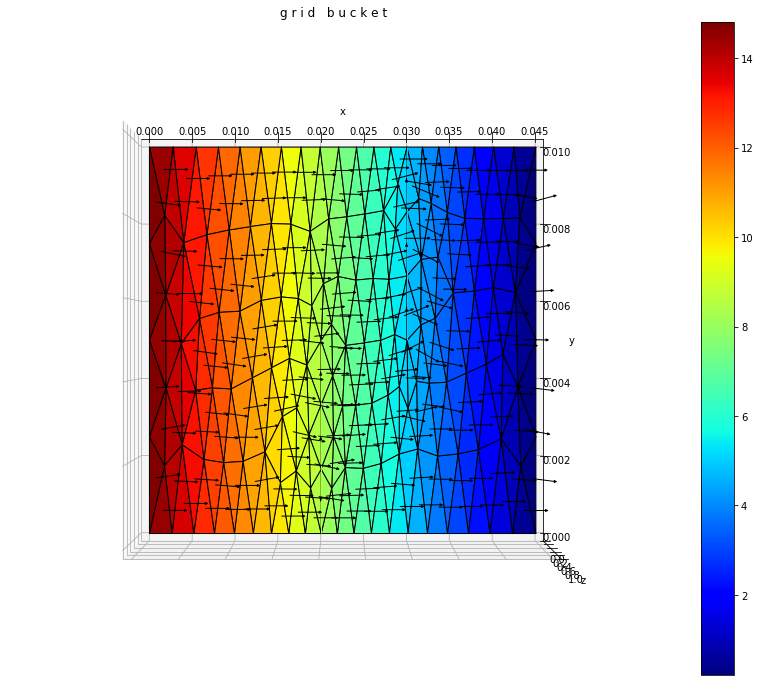

In [13]:
## to export the flux
key='Ca'
flux='darcy_flux'
mortar='mortar_flux'
flux_P0="P0_flux"

discr_P0_flux = pp.MVEM(key)
for g, d in gb:
    discr_P0_flux.discretize(g, d)
    d[pp.STATE][flux] = d[pp.PARAMETERS][key][flux]

## construct the P0 flux reconstruction
pp.project_flux(gb, discr_P0_flux, flux, flux_P0, mortar)

for g,d in gb:
    print("P0_flux")
    print(d[pp.STATE]["P0_flux"])

for g,d in gb:
    print("pressure")
    print(d[pp.STATE]["pressure"])
    
for g,d in gb:
    d[pp.STATE]["P0_flux"]*=100000
pp.plot_grid(gb,"pressure","P0_flux",figsize=(15,12))

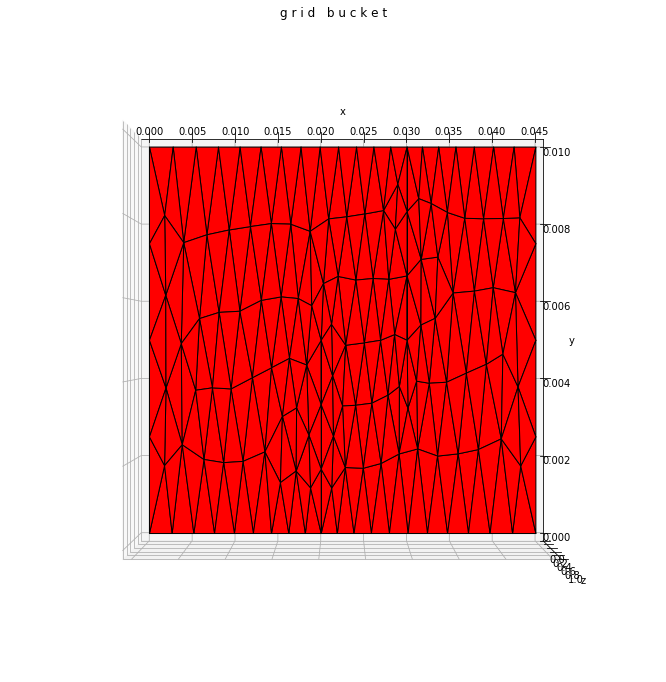

In [14]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}


# Generate a mixed-dimensional mesh
gb1= network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))

In [15]:
parameter={"aperture":1e-3,
           "fracture_perm":1,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
          #"fracture_perm":0.001,
           #"perm":1.0e-9,
           #"perm":2e-10,
           "perm":1e-10,
          #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          "bc_value":[10.0,0.0],
          #"bc_value":[5.0e-9,0.0],
           #"bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

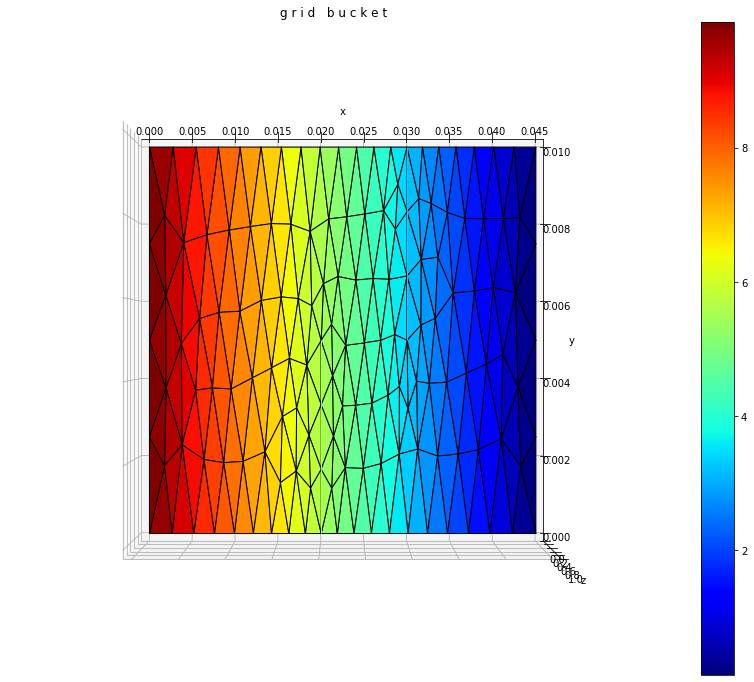

In [16]:
flow=Flow(gb1,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [17]:
parameter={
    "aperture":1e-3,
    "por":0.3,
    "por_frac":0.3,
    #"por":1.0,
    #"por_frac":1.0,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport_CaSiO3=Transport(gb1,domain,parameter)

In [18]:
transport_CaSiO3.set_data(CaSiO3_value,CaSiO3_type,CaSiO3)
transport_CaSiO3.get_flux(CaSiO3)    
transport_CaSiO3.discretize(CaSiO3)
lhs_CaSiO3,rhs_source_adv_CaSiO3,rhs_mass_CaSiO3,assembler_CaSiO3=transport_CaSiO3.get_transport_lhs_rhs(CaSiO3)

In [19]:
save_every = 100
n_steps = int(np.round(parameter["t_max"] / parameter["time_step"]))

# Initial condition
tracer1 = np.zeros(rhs_source_adv_Ca.size)
assembler_Ca.distribute_variable(
    tracer1, variable_names=[Ca,transport.mortar_variable]
)

tracer2 = np.zeros(rhs_source_adv_CaSiO3.size)
l=0
for g,d in gb1:
    if(g.dim == gb.dim_max()):
        for j in range(g.num_cells):
            tracer2[j]=58.6264
        l=g.num_cells
    else:
        for i in range(l,l+g.num_cells,1):
            tracer2[i]=58.6264
        l+=g.num_cells

assembler_CaSiO3.distribute_variable(
    tracer2, variable_names=[CaSiO3,transport.mortar_variable]
)


# Exporter
exporter1 = pp.Exporter(gb, file_name="Ca", folder_name="Ca_zero_frac")
export_field1 = ["Ca"]
IEsolver_Ca = sps.linalg.factorized(lhs_Ca)

exporter2= pp.Exporter(gb1, file_name="CaSiO3", folder_name="CaSiO3_zero_frac")
export_field2 = ["CaSiO3"]
IEsolver_CaSiO3 = sps.linalg.factorized(lhs_CaSiO3)

/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


Ca
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Ca
[0. 0. 0.]
Ca
[0. 0. 0.]
CaSiO3
[58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264
 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264
 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 58.6264 5

 2.49642058e-06 2.49642058e-06 2.49642058e-06 2.49642058e-06]
Ca
[2.94928912 2.94928938 2.94928943 2.94928943 2.9492872  2.94927382
 2.94928941 2.94928943 2.94928943 2.94928943 2.94928943 2.94928943
 2.94928943 2.94928943 2.94928943 2.94928041 2.94928943 2.94928943
 2.94928943 2.94928943 2.94928943 2.94928943 2.94928943 2.94928943
 2.94928943 2.94928943 2.94926871 2.94928943 2.94928943 2.94928943
 2.94928943 2.94923194 2.94928943 2.94928943 2.94928943 2.94928943
 2.94928943 2.94928943 2.94928943 2.94928943 2.94928943 2.94928943
 2.94928647 2.94928943 2.94928943 2.94928943 2.94928943 2.94928943
 2.94928943 2.94928943 2.94928943 2.94928943 2.94928943 2.94928943
 2.93971185 2.94928943 2.94928943 2.94928943 2.94928943 2.94928943
 2.94928943 2.94535201 2.94928943 2.94928942 2.94928943 2.94928943
 2.52039197 2.9491489  2.94928943 2.94742684 2.94928943 2.94928943
 2.94928936 2.94928943 2.94928943 2.94928943 2.77158375 2.94928943
 2.94928943 2.94928941 2.94928943 2.94928943 2.94928943 2.949289

Ca
[4.80936997 4.80945106 4.80948183 4.80948183 4.80899609 4.80742571
 4.80946871 4.80948113 4.80948183 4.80948183 4.80948167 4.80948183
 4.80948183 4.80948183 4.80948183 4.80821883 4.80948183 4.80948183
 4.80948183 4.80948183 4.80948181 4.80948183 4.80948183 4.80948183
 4.80948183 4.80948183 4.80684936 4.80948179 4.80948183 4.80948054
 4.80948183 4.80456697 4.80948183 4.80948183 4.80948183 4.80948113
 4.80948183 4.80948183 4.80948183 4.80948183 4.80948183 4.80948183
 4.80885948 4.80948183 4.80948183 4.80947876 4.80948183 4.80948183
 4.80948183 4.80948178 4.80948183 4.80947835 4.80948183 4.80948183
 4.62415385 4.80948183 4.80948183 4.80948183 4.80948183 4.80948182
 4.80948183 4.71943725 4.80948183 4.80947519 4.80948183 4.80948183
 2.76926837 4.80107206 4.80948183 4.75014972 4.80947992 4.80948183
 4.80945073 4.80948158 4.80948183 4.80948183 3.55355555 4.80948183
 4.80948183 4.80946628 4.80948183 4.80948183 4.80948183 4.80948183
 4.55493108 4.79114061 4.80948183 4.80948183 4.16461599 4.8

Ca
[7.41058707 7.41814189 7.42349586 7.42349586 7.38784625 7.3276651
 7.42074614 7.4231749  7.42349586 7.42349586 7.42338532 7.42349576
 7.42349586 7.42349586 7.42349565 7.3592522  7.42348605 7.42349586
 7.42349586 7.42349586 7.42346596 7.4234956  7.42349586 7.42349586
 7.4234958  7.42349586 7.30683838 7.42345444 7.42349586 7.42305345
 7.42349586 7.26286011 7.42349586 7.42349586 7.42349586 7.42314518
 7.42349586 7.42349586 7.42349263 7.42349586 7.42349586 7.42349586
 7.37998953 7.42349586 7.42349586 7.42251097 7.42349502 7.42349586
 7.42349586 7.42345352 7.42349586 7.42246624 7.42349586 7.42349586
 5.79919067 7.42349586 7.42349482 7.42349586 7.42349586 7.42348406
 7.42349586 6.44920958 7.42349586 7.42203303 7.42349586 7.42349586
 1.73345104 7.21186615 7.42349586 6.61672874 7.42272782 7.42349585
 7.41907552 7.42336107 7.42349586 7.42349586 2.77200484 7.42349586
 7.42349583 7.42051577 7.42349586 7.42349585 7.42349197 7.42349586
 5.59525247 7.03974519 7.42349558 7.42349542 4.31541923 7.42

Ca
[9.62820073e+00 9.71580720e+00 9.81739499e+00 9.81739497e+00
 9.42774820e+00 9.03703248e+00 9.75685205e+00 9.80554497e+00
 9.81739499e+00 9.81739499e+00 9.81201802e+00 9.81736624e+00
 9.81739499e+00 9.81739498e+00 9.81735697e+00 9.25042588e+00
 9.81642576e+00 9.81739499e+00 9.81739494e+00 9.81739499e+00
 9.81515051e+00 9.81734479e+00 9.81739434e+00 9.81739499e+00
 9.81737873e+00 9.81739499e+00 8.90882710e+00 9.81479349e+00
 9.81739499e+00 9.80340020e+00 9.81739499e+00 8.74818362e+00
 9.81739499e+00 9.81739499e+00 9.81739451e+00 9.80390448e+00
 9.81739499e+00 9.81739345e+00 9.81707199e+00 9.81739499e+00
 9.81739453e+00 9.81739468e+00 9.36193722e+00 9.81739499e+00
 9.81739499e+00 9.78885191e+00 9.81728250e+00 9.81739499e+00
 9.81739499e+00 9.81503418e+00 9.81739499e+00 9.78900626e+00
 9.81739289e+00 9.81739499e+00 5.03915454e+00 9.81739499e+00
 9.81724552e+00 9.81739499e+00 9.81739499e+00 9.81651370e+00
 9.81739497e+00 6.43604639e+00 9.81739499e+00 9.78291325e+00
 9.81739499e+00 9.817

Ca
[1.08490212e+01 1.11471804e+01 1.16443969e+01 1.16443950e+01
 1.02710307e+01 9.33891454e+00 1.13164651e+01 1.15558948e+01
 1.16443969e+01 1.16443969e+01 1.15968946e+01 1.16436798e+01
 1.16443969e+01 1.16443962e+01 1.16436216e+01 9.86560785e+00
 1.16314987e+01 1.16443968e+01 1.16443936e+01 1.16443969e+01
 1.16191506e+01 1.16433457e+01 1.16443657e+01 1.16443969e+01
 1.16439856e+01 1.16443967e+01 9.04506101e+00 1.16176091e+01
 1.16443969e+01 1.15474969e+01 1.16443969e+01 8.80482480e+00
 1.16443969e+01 1.16443967e+01 1.16443756e+01 1.15422035e+01
 1.16443968e+01 1.16443398e+01 1.16398413e+01 1.16443969e+01
 1.16443728e+01 1.16443808e+01 1.00884123e+01 1.16443969e+01
 1.16443969e+01 1.14617917e+01 1.16424899e+01 1.16443969e+01
 1.16443969e+01 1.16212307e+01 1.16443969e+01 1.14672493e+01
 1.16443138e+01 1.16443969e+01 3.67903391e+00 1.16443969e+01
 1.16418055e+01 1.16443969e+01 1.16443969e+01 1.16340256e+01
 1.16443953e+01 5.37395542e+00 1.16443969e+01 1.14454285e+01
 1.16443969e+01 1.164

Ca
[1.11692451e+01 1.18134027e+01 1.33235689e+01 1.33235165e+01
 1.00721649e+01 8.55233219e+00 1.22400904e+01 1.29459796e+01
 1.33235689e+01 1.33235688e+01 1.30926253e+01 1.33157251e+01
 1.33235688e+01 1.33235478e+01 1.33161047e+01 9.44092339e+00
 1.32384584e+01 1.33235656e+01 1.33234907e+01 1.33235688e+01
 1.31776120e+01 1.33133905e+01 1.33229900e+01 1.33235683e+01
 1.33189275e+01 1.33235622e+01 8.09106783e+00 1.31770019e+01
 1.33235689e+01 1.29292802e+01 1.33235688e+01 7.85645954e+00
 1.33235689e+01 1.33235635e+01 1.33231878e+01 1.28866534e+01
 1.33235670e+01 1.33226913e+01 1.32909667e+01 1.33235681e+01
 1.33230926e+01 1.33232490e+01 9.73772536e+00 1.33235689e+01
 1.33235689e+01 1.26373802e+01 1.33077467e+01 1.33235689e+01
 1.33235689e+01 1.31994790e+01 1.33235686e+01 1.26672823e+01
 1.33222466e+01 1.33235685e+01 2.35829630e+00 1.33235687e+01
 1.33020296e+01 1.33235679e+01 1.33235689e+01 1.32593467e+01
 1.33235251e+01 3.96236028e+00 1.33235688e+01 1.26225101e+01
 1.33235689e+01 1.332

Ca
[1.05049186e+01 1.15275801e+01 1.48621067e+01 1.48614068e+01
 8.93736312e+00 7.02593943e+00 1.22970918e+01 1.37627761e+01
 1.48621073e+01 1.48621054e+01 1.41168248e+01 1.48137995e+01
 1.48621062e+01 1.48617870e+01 1.48195961e+01 8.18146212e+00
 1.45158357e+01 1.48620426e+01 1.48611730e+01 1.48621037e+01
 1.43278900e+01 1.48045861e+01 1.48565769e+01 1.48620943e+01
 1.48323289e+01 1.48619939e+01 6.46763185e+00 1.43431297e+01
 1.48621076e+01 1.37471876e+01 1.48621053e+01 6.31442774e+00
 1.48621074e+01 1.48620125e+01 1.48585133e+01 1.35974317e+01
 1.48620687e+01 1.48548191e+01 1.47166045e+01 1.48620897e+01
 1.48573488e+01 1.48588479e+01 8.47609542e+00 1.48621075e+01
 1.48621076e+01 1.30650547e+01 1.47823841e+01 1.48621075e+01
 1.48621076e+01 1.44246541e+01 1.48621005e+01 1.31547122e+01
 1.48510052e+01 1.48620964e+01 1.37171325e+00 1.48621030e+01
 1.47547981e+01 1.48620825e+01 1.48621075e+01 1.46073901e+01
 1.48615182e+01 2.65013331e+00 1.48621061e+01 1.30956115e+01
 1.48621073e+01 1.486

Ca
[8.71408244e+00 1.00514379e+01 1.65349903e+01 1.65271868e+01
 6.87085880e+00 4.90270915e+00 1.11968052e+01 1.37423826e+01
 1.65350065e+01 1.65349551e+01 1.44511357e+01 1.62859047e+01
 1.65349728e+01 1.65309398e+01 1.63265408e+01 6.13951409e+00
 1.53435408e+01 1.65339435e+01 1.65255526e+01 1.65349123e+01
 1.48721701e+01 1.62586229e+01 1.64910651e+01 1.65347491e+01
 1.63727988e+01 1.65333764e+01 4.35458987e+00 1.49528626e+01
 1.65350156e+01 1.37581422e+01 1.65349563e+01 4.32474329e+00
 1.65350103e+01 1.65335825e+01 1.65062725e+01 1.33644868e+01
 1.65343358e+01 1.64836806e+01 1.59731931e+01 1.65346630e+01
 1.64956942e+01 1.65072011e+01 6.35189753e+00 1.65350139e+01
 1.65350157e+01 1.24261045e+01 1.61884077e+01 1.65350121e+01
 1.65350157e+01 1.51907283e+01 1.65348563e+01 1.26357300e+01
 1.64574577e+01 1.65347575e+01 6.51016799e-01 1.65349082e+01
 1.60794715e+01 1.65345062e+01 1.65350122e+01 1.56579017e+01
 1.65283346e+01 1.47996865e+00 1.65349748e+01 1.25919572e+01
 1.65350052e+01 1.653

Ca
[6.45994336e+00 7.84878439e+00 1.80339096e+01 1.79845027e+01
 4.71363241e+00 3.05468515e+00 9.18028489e+00 1.26029893e+01
 1.80341292e+01 1.80334343e+01 1.36722186e+01 1.71948948e+01
 1.80336466e+01 1.80053759e+01 1.73452489e+01 4.13728695e+00
 1.51307924e+01 1.80248204e+01 1.79781307e+01 1.80329288e+01
 1.42858247e+01 1.71451001e+01 1.78243319e+01 1.80314661e+01
 1.74563519e+01 1.80212360e+01 2.61445814e+00 1.44953053e+01
 1.80342791e+01 1.26840993e+01 1.80335057e+01 2.66871471e+00
 1.80341886e+01 1.80224610e+01 1.78938896e+01 1.19708255e+01
 1.80279410e+01 1.78084522e+01 1.65029949e+01 1.80306320e+01
 1.78411021e+01 1.78924745e+01 4.24420385e+00 1.80342477e+01
 1.80342814e+01 1.07073152e+01 1.69950265e+01 1.80342120e+01
 1.80342830e+01 1.49792956e+01 1.80324291e+01 1.10560519e+01
 1.77010609e+01 1.80312896e+01 2.86196104e-01 1.80329937e+01
 1.67080779e+01 1.80289853e+01 1.80342171e+01 1.58523035e+01
 1.79910102e+01 7.59964105e-01 1.80337249e+01 1.10633839e+01
 1.80340998e+01 1.801

rd
[2.44208029e-06 2.40906522e-06 1.57990759e-06 1.59568645e-06
 2.47090975e-06 2.48724101e-06 2.36629683e-06 2.19476540e-06
 1.57978591e-06 1.58016672e-06 2.12032454e-06 1.74561056e-06
 1.58006075e-06 1.58974742e-06 1.71695426e-06 2.47714225e-06
 1.99910676e-06 1.58353987e-06 1.59699689e-06 1.58041457e-06
 2.07611887e-06 1.75070333e-06 1.63414219e-06 1.58100141e-06
 1.70080196e-06 1.58465123e-06 2.49009988e-06 2.05332164e-06
 1.57968948e-06 2.18670287e-06 1.58011013e-06 2.48943402e-06
 1.57974946e-06 1.58429681e-06 1.61724004e-06 2.23770467e-06
 1.58238443e-06 1.63554943e-06 1.83669555e-06 1.58135941e-06
 1.63072546e-06 1.61850438e-06 2.47660984e-06 1.57971173e-06
 1.57968719e-06 2.30328718e-06 1.77009354e-06 1.57973780e-06
 1.57968597e-06 2.00437777e-06 1.58061038e-06 2.28343291e-06
 1.65938790e-06 1.58115650e-06 2.49637299e-06 1.58034608e-06
 1.81307657e-06 1.58209372e-06 1.57973242e-06 1.91424373e-06
 1.59383093e-06 2.49599092e-06 1.57999966e-06 2.28062155e-06
 1.57980807e-06 1.587

Ca
[3.17250822e+00 4.18956254e+00 2.01811335e+01 1.97417014e+01
 2.04710569e+00 1.14076777e+00 5.33624246e+00 9.05963809e+00
 2.01865596e+01 2.01698278e+01 1.04250196e+01 1.68378066e+01
 2.01740928e+01 1.98894591e+01 1.74213700e+01 1.77074092e+00
 1.24687285e+01 2.00595230e+01 1.97192268e+01 2.01600565e+01
 1.11264323e+01 1.67896827e+01 1.88936696e+01 2.01406999e+01
 1.76743825e+01 2.00303383e+01 9.18050419e-01 1.16060603e+01
 2.01914987e+01 9.26102532e+00 2.01728778e+01 9.99252748e-01
 2.01883457e+01 2.00387967e+01 1.92739909e+01 8.14272849e+00
 2.00953987e+01 1.89019441e+01 1.53666351e+01 2.01280468e+01
 1.89597012e+01 1.92282283e+01 1.76725307e+00 2.01902631e+01
 2.01916684e+01 6.79195520e+00 1.64983993e+01 2.01887799e+01
 2.01917394e+01 1.25276467e+01 2.01538677e+01 7.27875292e+00
 1.83937658e+01 2.01327916e+01 6.45736365e-02 2.01639683e+01
 1.57171903e+01 2.01014840e+01 2.01891550e+01 1.40604344e+01
 1.97876640e+01 2.18368239e-01 2.01774108e+01 7.38526920e+00
 2.01853062e+01 1.993

Ca
[2.04732179e+00 2.80897147e+00 2.10909285e+01 2.01258029e+01
 1.24833157e+00 6.48637309e-01 3.73029566e+00 7.07700550e+00
 2.11089121e+01 2.10544210e+01 8.39331993e+00 1.56885759e+01
 2.10672095e+01 2.04147316e+01 1.65770314e+01 1.07913362e+00
 1.04321170e+01 2.07780932e+01 2.00985969e+01 2.10257648e+01
 9.01783539e+00 1.56747067e+01 1.86439883e+01 2.09773981e+01
 1.68845196e+01 2.07188952e+01 5.06488251e-01 9.59227479e+00
 2.11275227e+01 7.31118043e+00 2.10657100e+01 5.73278002e-01
 2.11153632e+01 2.07338131e+01 1.93162791e+01 6.14941558e+00
 2.08637372e+01 1.87119644e+01 1.39182800e+01 2.09435308e+01
 1.87451572e+01 1.92085753e+01 1.05707115e+00 2.11225367e+01
 2.11284015e+01 4.95492520e+00 1.53449692e+01 2.11164398e+01
 2.11286895e+01 1.06475690e+01 2.10112528e+01 5.43490669e+00
 1.78639470e+01 2.09506335e+01 2.94503153e-02 2.10402889e+01
 1.42958420e+01 2.08714799e+01 2.11181946e+01 1.23654968e+01
 2.02145498e+01 1.11517563e-01 2.10796481e+01 5.56873232e+00
 2.11038876e+01 2.051

Ca
[1.26287155e+00 1.79547223e+00 2.18705767e+01 2.00521550e+01
 7.30055066e-01 3.54913982e-01 2.48229445e+00 5.26063612e+00
 2.19188764e+01 2.17752493e+01 6.42492624e+00 1.40009073e+01
 2.18064378e+01 2.05374606e+01 1.51939754e+01 6.33214513e-01
 8.27783310e+00 2.11976875e+01 2.00305659e+01 2.17068918e+01
 6.92557387e+00 1.40396855e+01 1.77903956e+01 2.16070094e+01
 1.55279901e+01 2.10967410e+01 2.69034930e-01 7.53733940e+00
 2.19751359e+01 5.50042533e+00 2.18076586e+01 3.17895875e-01
 2.19376042e+01 2.11172084e+01 1.88265432e+01 4.40599038e+00
 2.13691341e+01 1.79587532e+01 1.20723940e+01 2.15321811e+01
 1.79268108e+01 1.86238914e+01 6.07226535e-01 2.19591601e+01
 2.19786410e+01 3.43450938e+00 1.37057910e+01 2.19393520e+01
 2.19795277e+01 8.63141744e+00 2.16794577e+01 3.86517073e+00
 1.67164154e+01 2.15372231e+01 1.31597493e-02 2.17478988e+01
 1.24383284e+01 2.13717088e+01 2.19455799e+01 1.03906505e+01
 2.01984499e+01 5.55177483e-02 2.18426194e+01 4.00542744e+00
 2.19031070e+01 2.071

Ca
[7.49139916e-01 1.10097256e+00 2.24814802e+01 1.94590925e+01
 4.11835492e-01 1.87886572e-01 1.58200387e+00 3.73824059e+00
 2.25903137e+01 2.22727602e+01 4.69438136e+00 1.19565635e+01
 2.23368650e+01 2.01800551e+01 1.33984166e+01 3.59693655e-01
 6.24642346e+00 2.12321080e+01 1.94582188e+01 2.21351380e+01
 5.05867113e+00 1.20549385e+01 1.63673977e+01 2.19586201e+01
 1.37269357e+01 2.10828636e+01 1.38335734e-01 5.64879441e+00
 2.27315665e+01 3.96033849e+00 2.23487987e+01 1.71236309e-01
 2.26355477e+01 2.11036276e+01 1.77947406e+01 3.01111483e+00
 2.15295510e+01 1.66686649e+01 1.00306859e+01 2.18174329e+01
 1.65327540e+01 1.74700218e+01 3.36962425e-01 2.26894250e+01
 2.27427880e+01 2.27504098e+00 1.17496713e+01 2.26366252e+01
 2.27449176e+01 6.68915276e+00 2.20921161e+01 2.63216675e+00
 1.50344962e+01 2.18095646e+01 5.78229744e-03 2.22290081e+01
 1.03526746e+01 2.15129526e+01 2.26543147e+01 8.35281591e+00
 1.96712478e+01 2.70430563e-02 2.24227665e+01 2.76210316e+00
 2.25498702e+01 2.046

Ca
[4.29500073e-01 6.51062326e-01 2.28678008e+01 1.83387821e+01
 2.25134953e-01 9.66436313e-02 9.70771224e-01 2.55153852e+00
 2.30796192e+01 2.24728091e+01 3.28842100e+00 9.77220606e+00
 2.25872026e+01 1.93069553e+01 1.13619883e+01 1.98655254e-01
 4.49935550e+00 2.08127251e+01 1.83745324e+01 2.22316803e+01
 3.53022349e+00 9.92383798e+00 1.44874343e+01 2.19569825e+01
 1.16565492e+01 2.06166367e+01 6.91553526e-02 4.05375514e+00
 2.33828298e+01 2.74117894e+00 2.26244142e+01 8.99521028e-02
 2.31731965e+01 2.06280698e+01 1.62749501e+01 1.97328008e+00
 2.12718381e+01 1.49347131e+01 7.99333711e+00 2.17229710e+01
 1.46701814e+01 1.58160325e+01 1.81485620e-01 2.32885106e+01
 2.34126615e+01 1.44790827e+00 9.67095688e+00 2.31693812e+01
 2.34166909e+01 4.97136796e+00 2.21746976e+01 1.72519623e+00
 1.29754110e+01 2.16847910e+01 2.50550092e-03 2.24137895e+01
 8.25187907e+00 2.12159038e+01 2.32112357e+01 6.43761223e+00
 1.86156315e+01 1.29264154e-02 2.27602101e+01 1.83497980e+00
 2.29918687e+01 1.970

Ca
[2.38952678e-01 3.72889495e-01 2.29652349e+01 1.67442176e+01
 1.19708999e-01 4.84674107e-02 5.76113961e-01 1.68035502e+00
 2.33301853e+01 2.23025970e+01 2.21838080e+00 7.65339918e+00
 2.24842755e+01 1.79374944e+01 9.26927248e+00 1.07043684e-01
 3.10703813e+00 1.99076717e+01 1.68287508e+01 2.19255763e+01
 2.36478881e+00 7.84155396e+00 1.23213739e+01 2.15405033e+01
 9.51071642e+00 1.96743379e+01 3.37300925e-02 2.79759846e+00
 2.39005460e+01 1.83179987e+00 2.25674111e+01 4.62281295e-02
 2.35001719e+01 1.96645289e+01 1.43793307e+01 1.24597566e+00
 2.05509549e+01 1.29020581e+01 6.12217560e+00 2.11917637e+01
 1.25072922e+01 1.37951142e+01 9.52342968e-02 2.37167806e+01
 2.39683004e+01 8.89481940e-01 7.65195572e+00 2.34831525e+01
 2.39741927e+01 3.55607613e+00 2.18616071e+01 1.09321599e+00
 1.07393410e+01 2.11018307e+01 1.07307657e-03 2.22350775e+01
 6.31213364e+00 2.04330336e+01 2.35683158e+01 4.77078081e+00
 1.70746150e+01 6.07733895e-03 2.27890542e+01 1.17951032e+00
 2.31644395e+01 1.844

Ca
[1.29429052e-01 2.07568474e-01 2.27137552e+01 1.47843543e+01
 6.20997652e-02 2.37659044e-02 3.31859086e-01 1.07200254e+00
 2.32819914e+01 2.17077983e+01 1.44715226e+00 5.75662067e+00
 2.19698629e+01 1.61475862e+01 7.28433463e+00 5.64341114e-02
 2.06581441e+00 1.85326987e+01 1.49224295e+01 2.11713112e+01
 1.52724020e+00 5.96000385e+00 1.00660835e+01 2.06767745e+01
 7.46518172e+00 1.82778774e+01 1.60987364e-02 1.86440386e+00
 2.42422446e+01 1.18638497e+00 2.21227715e+01 2.33024738e-02
 2.35590217e+01 1.82361052e+01 1.22610733e+01 7.61129156e-01
 1.93627583e+01 1.07431032e+01 4.51939059e+00 2.02007679e+01
 1.02415057e+01 1.15820247e+01 4.88433665e-02 2.39236544e+01
 2.43769477e+01 5.29481363e-01 5.83229159e+00 2.35162547e+01
 2.43829011e+01 2.45740505e+00 2.11118871e+01 6.72318784e-01
 8.52887082e+00 2.00379978e+01 4.55113550e-04 2.16438497e+01
 4.64705736e+00 1.91628942e+01 2.36691893e+01 3.41100798e+00
 1.51489638e+01 2.81572928e-03 2.24511032e+01 7.36292909e-01
 2.30029264e+01 1.674

Ca
[6.84378875e-02 1.12617712e-01 2.20700247e+01 1.26087782e+01
 3.15082042e-02 1.14213592e-02 1.86094825e-01 6.64737396e-01
 2.28830500e+01 2.06658291e+01 9.16159690e-01 4.17069710e+00
 2.10146258e+01 1.40615025e+01 5.52571485e+00 2.91779275e-02
 1.32763024e+00 1.67537402e+01 1.27961071e+01 1.99611155e+01
 9.54527402e-01 4.36940603e+00 7.90604237e+00 1.93725193e+01
 5.64890636e+00 1.64963338e+01 7.53777023e-03 1.20427831e+00
 2.43561293e+01 7.47145871e-01 2.12596960e+01 1.15458852e-02
 2.32955841e+01 1.64164607e+01 1.00886430e+01 4.51325839e-01
 1.77495833e+01 8.62677936e+00 3.22562645e+00 1.87692466e+01
 8.06062279e+00 9.36084891e+00 2.45488986e-02 2.38553845e+01
 2.45954783e+01 3.06371042e-01 4.29372321e+00 2.32113972e+01
 2.45969007e+01 1.64631826e+00 1.99199871e+01 4.02546398e-01
 6.51000095e+00 1.85180918e+01 1.91435512e-04 2.06213017e+01
 3.30360653e+00 1.74559769e+01 2.34589349e+01 2.36093053e+00
 1.29836103e+01 1.28765238e-03 2.17086675e+01 4.47715652e-01
 2.24561348e+01 1.472

Ca
[3.54074265e-02 5.96971597e-02 2.10169299e+01 1.03833035e+01
 1.56693660e-02 5.39039386e-03 1.01838108e-01 4.01767003e-01
 2.20995825e+01 1.91939283e+01 5.64547584e-01 2.91992398e+00
 1.96271648e+01 1.18340181e+01 4.05660172e+00 1.48234452e-02
 8.27449879e-01 1.46815910e+01 1.06074390e+01 1.83313830e+01
 5.79155423e-01 3.09932999e+00 5.98073575e+00 1.76775506e+01
 4.13185134e+00 1.44403743e+01 3.46993691e-03 7.56320318e-01
 2.41891145e+01 4.58775585e-01 1.99798804e+01 5.63329573e-03
 2.26693814e+01 1.43227464e+01 8.01661062e+00 2.60492727e-01
 1.57991253e+01 6.69017712e+00 2.23289090e+00 1.69611219e+01
 6.10884724e+00 7.29119190e+00 1.21188040e-02 2.34644287e+01
 2.45759652e+01 1.72762476e-01 3.06219116e+00 2.25269372e+01
 2.45650110e+01 1.07255160e+00 1.83213271e+01 2.35262982e-01
 4.78773481e+00 1.66164240e+01 7.99611062e-05 1.91861035e+01
 2.27530096e+00 1.54125796e+01 2.28940963e+01 1.58695215e+00
 1.07442124e+01 5.81990708e-04 2.05539653e+01 2.65854483e-01
 2.14973833e+01 1.252

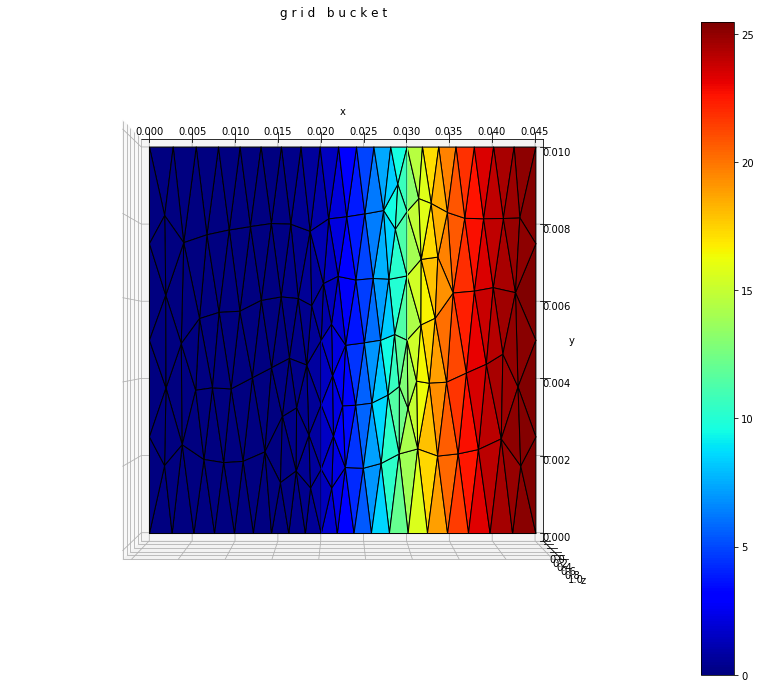

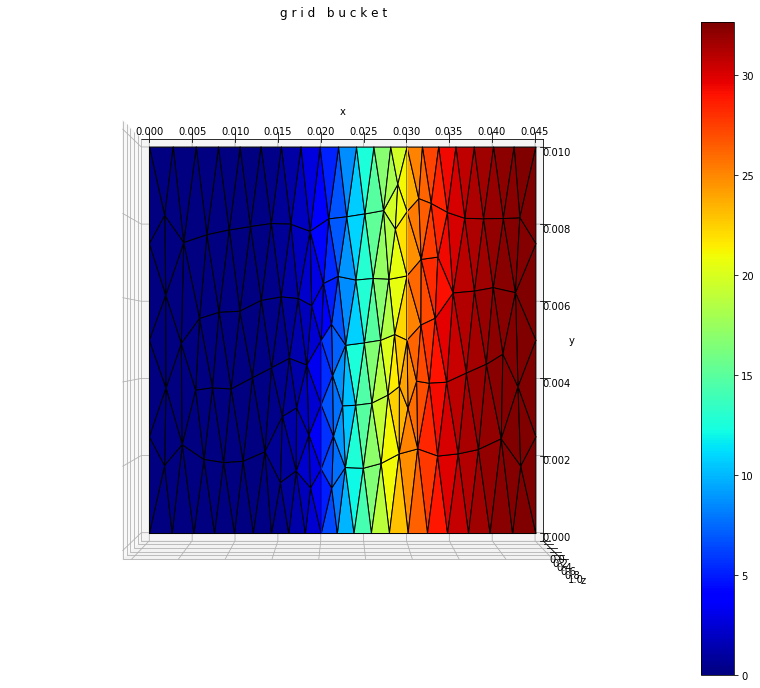

In [20]:

rd=np.zeros(tracer1.size)
#for i in range(10):
#for i in range(n_steps):
for i in range(1,n_steps+1,1):
    rd=reaction.compute_rd(tracer1,rd)
    if np.isclose((i-1) % save_every, 0):
            exporter1.write_vtu(export_field1, time_step=int((i-1) // save_every))
            exporter2.write_vtu(export_field2, time_step=int((i-1) // save_every))
            for g,d in gb:
                print("Ca")
                print(d[pp.STATE]["Ca"])
            for g,d in gb1:
                print("CaSiO3")
                print(d[pp.STATE]["CaSiO3"])
            print("FINE")
            print("rd")
            print(rd)
    
    #rd=reaction.compute_rd(tracer1,rd)
    tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca+rhs_mass_Ca*rd*tracer2*parameter["time_step"])
    tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3-rhs_mass_CaSiO3*rd*tracer2*parameter["time_step"])
    #tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca)
    #tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3)
    
    
    assembler_Ca.distribute_variable(
        tracer1,
        variable_names=[Ca,transport.mortar_variable],
    )
    assembler_CaSiO3.distribute_variable(
        tracer2,
        variable_names=[CaSiO3,transport.mortar_variable],
    )
    #print("tracer1")
    #print(tracer1)
    
exporter1.write_vtu(export_field1, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
    
exporter2.write_vtu(export_field2, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
exporter1.write_pvd(time_steps)
exporter2.write_pvd(time_steps)
transport.plot_tracer(Ca)
transport_CaSiO3.plot_tracer(CaSiO3)